In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn .metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn .metrics import accuracy_score
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import re 
pd.set_option('display.max_columns', None)

In [2]:
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [ ]:
df = pd.read_csv('train.csv', low_memory=False)

In [ ]:
len(df["Name"].unique())

array(['Aaron Maashoh', nan, 'Rick Rothackerj', ..., 'Chris Wickhamm',
       'Sarah McBridec', 'Nicks'], dtype=object)

Just the columns that contain null values will be displayed.

In [ ]:
df.isna().sum()[df.isna().sum() > 0]

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df.shape

(100000, 28)

We will not be keeping the __`Name`__, or __`SSN`__ fields because they are not relevant for the dataset.

In [ ]:
df.drop(columns=['Name', 'SSN'], inplace=True)

In [ ]:
sniff_modified(df)

,data type,percent missing,No. unique,unique values
Delay_from_due_date,int64,0.000,73,"[3, -1, 5, 6, 8, 7, 13, 10, 0, 4, 9, 1, 12, 11..."
Num_Bank_Accounts,int64,0.000,943,"[3, 2, 1, 7, 4, 0, 8, 5, 6, 9, 10, 1414, 1231,..."
Num_Credit_Card,int64,0.000,1179,"[4, 1385, 5, 1288, 1, 7, 6, 1029, 488, 8, 1381..."
Interest_Rate,int64,0.000,1750,"[3, 6, 8, 4, 5, 5318, 15, 7, 12, 20, 1, 433, 1..."
Total_EMI_per_month,float64,0.000,14950,"[49.57494921489417, 18.816214573128885, 246.99..."
Monthly_Inhand_Salary,float64,15.002,13236,"[1824.8433333333328, nan, 3037.986666666666, 1..."
Credit_Utilization_Ratio,float64,0.000,100000,"[26.822619623699016, 31.94496005538421, 28.609..."
Num_Credit_Inquiries,float64,1.965,1224,"[4.0, 2.0, 3.0, nan, 5.0, 9.0, 8.0, 7.0, 6.0, ..."
Payment_Behaviour,object,0.000,7,"[High_spent_Small_value_payments, Low_spent_La..."
Amount_invested_monthly,object,4.479,91050,"[80.41529543900253, 118.28022162236736, 81.699..."


#### Data Wranggling

Let's go through the dataset and swap out any weird numbers for nulls; so we can attempt to fill them in. 

In [ ]:
df.replace('_______', np.nan, inplace=True)
df.replace('_', np.nan, inplace=True)
df.replace('!@9#%8', np.nan, inplace=True)
df.replace('#F%$D@*&8', np.nan, inplace=True)
df.replace('__10000__', np.nan, inplace=True)
df.replace('__-333333333333333333333333333__', np.nan, inplace=True)

Several of the __`Age`__ values include a __minus sign followed by an underscore__. We changed the type of the underscore to float and replaced the underscore with the value "nothing" __(" ")__

In [ ]:
df.Age = df.Age.str.replace('_', '', regex=True).astype('float')
df.Annual_Income = df.Annual_Income.str.replace('_', '', regex=True).astype('float')
df.Num_of_Loan = df.Num_of_Loan.str.replace('_', '', regex=True).astype('float')
df.Outstanding_Debt = df.Outstanding_Debt.str.replace('_', '', regex=True).astype('float')
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.str.replace('_', '', regex=True).astype('float')
df.Num_Bank_Accounts = df.Num_Bank_Accounts.astype('float')
df.Amount_invested_monthly = df.Amount_invested_monthly.astype('float')
df.Monthly_Balance = df.Monthly_Balance.astype('float')
df.Changed_Credit_Limit = df.Changed_Credit_Limit.astype('float')

Replacing 'NM' in __`Payment_of_Min_Amount`__ with null so we can feel them with last value later.

In [ ]:
df.Payment_of_Min_Amount.replace('NM', np.nan, inplace=True)

Our work is now prepared for resolving outliers. So, we export our data to compare results before and after having outliers removed

In [ ]:
df.to_csv('before_outlier.csv', index=False)

#### Handling Outliers

After consulting a number of sources, we settle on a certain range for the variable's possible values.

In [ ]:
df.loc[df.Age > 76, 'Age'] = np.nan
df.loc[df.Age < 1, 'Age'] = np.nan

In [ ]:
df.loc[df.Num_of_Loan < 0, 'Num_of_Loan'] = np.nan
df.loc[df.Num_of_Loan > 9, 'Num_of_Loan'] = np.nan

In [ ]:
df.loc[df.Num_Credit_Card > 11, 'Num_Credit_Card'] = np.nan
df.loc[df.Interest_Rate > 36, 'Interest_Rate'] = np.nan
df.loc[df.Annual_Income > 300000, 'Annual_Income'] = np.nan
df.loc[df.Total_EMI_per_month > 5000, 'Total_EMI_per_month'] = np.nan
df.loc[df.Num_Bank_Accounts > 11, 'Num_Bank_Accounts'] = np.nan
df.loc[df.Num_Bank_Accounts < 0, 'Num_Bank_Accounts'] = np.nan
df.loc[df.Num_of_Delayed_Payment > 25, 'Num_of_Delayed_Payment'] = np.nan

In [ ]:
df.loc[0, 'Occupation'] = 'Scientist'
df.loc[df.Total_EMI_per_month > 5000, 'Total_EMI_per_month'] = np.nan
df.loc[df.Num_Credit_Inquiries > 15, 'Num_Credit_Inquiries'] = np.nan
df.loc[df.Num_Credit_Inquiries < 0, 'Num_Credit_Inquiries'] = np.nan

The outlier actions on our data are now being exported.

In [ ]:
df.to_csv('after_outlier.csv', index=False)

#### Feature Engineering

Making use of two separate variables for the numerical and category columns will make it much simpler for us to carry out feature engineering.

In [ ]:
cols = df.columns
num_cols = df._get_numeric_data().columns
num_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [ ]:
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['Payment_Behaviour',
 'Credit_Score',
 'Type_of_Loan',
 'Month',
 'ID',
 'Occupation',
 'Credit_Mix',
 'Customer_ID',
 'Payment_of_Min_Amount',
 'Credit_History_Age']

##### Treat Categorical Columns

During data cleansing, unnecessary values were replaced with nulls. So, here for categorical data, NA values will attempt to fill the NA by examining the customer's most recent non-null value. In this manner, values for category columns will be fixed.

In [ ]:
last = df.groupby('Customer_ID')[cat_cols].last()

for col in cat_cols:
    df.loc[df[col].isnull(), col] = df.Customer_ID.map(last[col])

In [ ]:
sniff_modified(df)

,data type,percent missing,No. unique,unique values
Delay_from_due_date,int64,0.000,73,"[3, -1, 5, 6, 8, 7, 13, 10, 0, 4, 9, 1, 12, 11..."
Num_Credit_Inquiries,float64,4.355,17,"[4.0, 2.0, 3.0, nan, 5.0, 9.0, 8.0, 7.0, 6.0, ..."
Changed_Credit_Limit,float64,2.091,4384,"[11.27, nan, 6.27, 9.27, 5.42, 7.42, 6.42, 7.1..."
Num_of_Delayed_Payment,float64,8.441,30,"[7.0, nan, 4.0, 8.0, 6.0, 1.0, -1.0, 3.0, 0.0,..."
Monthly_Balance,float64,1.209,98792,"[312.49408867943663, 284.62916249607184, 331.2..."
Num_of_Loan,float64,4.348,11,"[4.0, 1.0, 3.0, nan, 0.0, 2.0, 7.0, 5.0, 6.0, ..."
Outstanding_Debt,float64,0.000,12203,"[809.98, 605.03, 1303.01, 632.46, 943.86, 548...."
Num_Credit_Card,float64,2.271,13,"[4.0, nan, 5.0, 1.0, 7.0, 6.0, 8.0, 3.0, 9.0, ..."
Interest_Rate,float64,2.034,35,"[3.0, 6.0, 8.0, 4.0, 5.0, nan, 15.0, 7.0, 12.0..."
Monthly_Inhand_Salary,float64,15.002,13236,"[1824.8433333333328, nan, 3037.986666666666, 1..."


Before proceeding with the numerical columns, let's convert the credit history (in the format of years and months) to months.

In [ ]:
df.Credit_History_Age.fillna('0 0 0 0', inplace=True)
for index, column in df.iterrows():
    df.loc[index, 'Credit_History'] = float(df.loc[index, 'Credit_History_Age'].split()[0])*12+float(df.loc[index, 'Credit_History_Age'].split()[3])
df.loc[df.Credit_History_Age == 0, 'Credit_History'] = np.nan
df.Credit_History.interpolate(inplace = True)
df.drop(columns='Credit_History_Age', inplace=True)

In [ ]:
df.Payment_of_Min_Amount.fillna('No', inplace=True)
df.Type_of_Loan.fillna('Not Specified', inplace=True)

##### Treat numerical columns

The expression below will choose everything that is neither a number nor a dot.

In [ ]:
digits = re.compile('[^\d.]') 

In the number columns, we replace everything that is not a digit or a dot with nothing __(" ")__ .

In [ ]:
for index, column in df.iterrows():
    for x in num_cols:
        df.loc[index, x] = digits.sub('', str(df.loc[index, x]))

Now we must replace the empty string __(" ")__ with NaN and store the column as a float.

In [ ]:
for column in num_cols:
    df[column].replace('', np.nan, inplace=True)
    df[column] = df[column].astype('float')

Now, for the purpose of correcting numerical columns, we will replace NA values with the variable's mean value.

In [ ]:
mean = df.groupby('Customer_ID')[num_cols].mean()

In [ ]:
for col in num_cols:
    df.loc[df[col].isnull(), col] = df.Customer_ID.map(mean[col])

After cleaning the data, we export it for use in data visualisations and dashboards to determine the relationship between our variables.

In [ ]:
df.to_csv('for_data_visuals.csv', index=False)

In [ ]:
sniff_modified(df)

,data type,percent missing,No. unique,unique values
Delay_from_due_date,float64,0.0,68,"[3.0, 1.0, 5.0, 6.0, 8.0, 7.0, 13.0, 10.0, 0.0..."
Monthly_Balance,float64,0.0,99759,"[312.49408867943663, 284.62916249607184, 331.2..."
Amount_invested_monthly,float64,0.0,97528,"[80.41529543900253, 118.28022162236736, 81.699..."
Total_EMI_per_month,float64,0.0,13282,"[49.57494921489417, 18.816214573128885, 246.99..."
Credit_Utilization_Ratio,float64,0.0,100000,"[26.822619623699016, 31.94496005538421, 28.609..."
Outstanding_Debt,float64,0.0,12203,"[809.98, 605.03, 1303.01, 632.46, 943.86, 548...."
Num_Credit_Inquiries,float64,0.0,170,"[4.0, 2.0, 3.0, 5.0, 9.0, 8.0, 7.0, 6.0, 0.0, ..."
Changed_Credit_Limit,float64,0.0,5286,"[11.27, 10.269999999999998, 6.27, 9.27, 5.42, ..."
Num_of_Delayed_Payment,float64,0.0,391,"[7.0, 6.0, 4.0, 8.0, 1.0, 3.0, 0.0, 5.0, 9.0, ..."
Num_of_Loan,float64,0.0,10,"[4.0, 1.0, 3.0, 0.0, 2.0, 7.0, 5.0, 6.0, 8.0, ..."


#### Converting Object to float64 by Encoding

In [ ]:
month = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}
df.Month.replace(month, inplace=True)
df.Month = df.Month.astype(int)

Since __`credit_mix`__ and __`credit_score`__ are both ordinal categories, I will be replacing their respective categories with the values __-1, 0, and 1__ respectively.

In [ ]:
credit_mix = {
    'Standard': 0,
    'Good': 1,
    'Bad': -1
}
df.Credit_Mix.replace(credit_mix, inplace=True)
df.Credit_Mix = df.Credit_Mix.astype(int)

In [ ]:
Credit_Score = {
    'Standard': 0,
    'Good': 1,
    'Poor': -1
}
df.Credit_Score.replace(Credit_Score, inplace=True)
df.Credit_Score = df.Credit_Score.astype(int)

In order to get our data ready for modelling, we apply the __LableEncoder()__ to any category columns that are still present.

In [ ]:
Occupation_le = LabelEncoder()

df['Occupation'] = Occupation_le.fit_transform(df['Occupation'])
Occupation_le.classes_

array(['Accountant', 'Architect', 'Developer', 'Doctor', 'Engineer',
       'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
       'Media_Manager', 'Musician', 'Scientist', 'Teacher', 'Writer'],
      dtype=object)

In [ ]:
Payment_Behaviour_le = LabelEncoder()

df['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(df['Payment_Behaviour'])
Payment_Behaviour_le.classes_

array(['High_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments'], dtype=object)

In [ ]:
Payment_of_Min_Amount_le = LabelEncoder()

df['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(df['Payment_of_Min_Amount'])
Payment_of_Min_Amount_le.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Missed_Payment_Day'] = 0
for row in df.index:
    if df.loc[row, 'Delay_from_due_date'] > 0:
        df.loc[row, 'Missed_Payment_Day'] = 1

Getting rid of a few of the less crucial columns

In [ ]:
df = df.drop(['Customer_ID', 'ID', 'Type_of_Loan'], axis=1)

The data that has been prepared for modelling is exported for the final time.

In [ ]:
df.to_csv('after_fe_outlier.csv', index=False)

#### Examining the work we've done to clean the data in comparison to the Raw Data

In [ ]:
df = pd.read_csv('after_fe_outlier.csv')
bdf = pd.read_csv('train.csv')

In [ ]:
sniff_modified(df)

,data type,percent missing,No. unique,unique values
Month,int64,0.0,8,"[1, 2, 3, 4, 5, 6, 7, 8]"
Credit_Score,int64,0.0,3,"[1, 0, -1]"
Payment_Behaviour,int64,0.0,6,"[2, 3, 4, 5, 1, 0]"
Payment_of_Min_Amount,int64,0.0,2,"[0, 1]"
Credit_Mix,int64,0.0,3,"[1, 0, -1]"
Missed_Payment_Day,int64,0.0,2,"[1, 0]"
Occupation,int64,0.0,15,"[12, 13, 4, 5, 2, 7, 10, 3, 6, 8, 0, 11, 9, 14..."
Num_Credit_Card,float64,0.0,41,"[4.0, 5.0, 1.0, 7.0, 6.0, 8.0, 3.0, 9.0, 2.0, ..."
Age,float64,0.0,386,"[23.0, 28.0, 34.0, 54.0, 55.0, 21.0, 31.0, 33...."
Monthly_Balance,float64,0.0,99759,"[312.49408867943663, 284.62916249607184, 331.2..."


The presence of __NaN__ in this context suggests that those columns were eliminated during the data cleaning procedure.|

In [ ]:
mdf = pd.concat([bdf.isnull().sum(), df.isnull().sum()], axis=1, keys=['Before', 'After'])
print(mdf)

                           Before  After
ID                            0.0    NaN
Customer_ID                   0.0    NaN
Month                         0.0    0.0
Name                       9985.0    NaN
Age                           0.0    0.0
SSN                           0.0    NaN
Occupation                    0.0    0.0
Annual_Income                 0.0    0.0
Monthly_Inhand_Salary     15002.0    0.0
Num_Bank_Accounts             0.0    0.0
Num_Credit_Card               0.0    0.0
Interest_Rate                 0.0    0.0
Num_of_Loan                   0.0    0.0
Type_of_Loan              11408.0    NaN
Delay_from_due_date           0.0    0.0
Num_of_Delayed_Payment     7002.0    0.0
Changed_Credit_Limit          0.0    0.0
Num_Credit_Inquiries       1965.0    0.0
Credit_Mix                    0.0    0.0
Outstanding_Debt              0.0    0.0
Credit_Utilization_Ratio      0.0    0.0
Credit_History_Age         9030.0    NaN
Payment_of_Min_Amount         0.0    0.0
Total_EMI_per_mo

<AxesSubplot: >

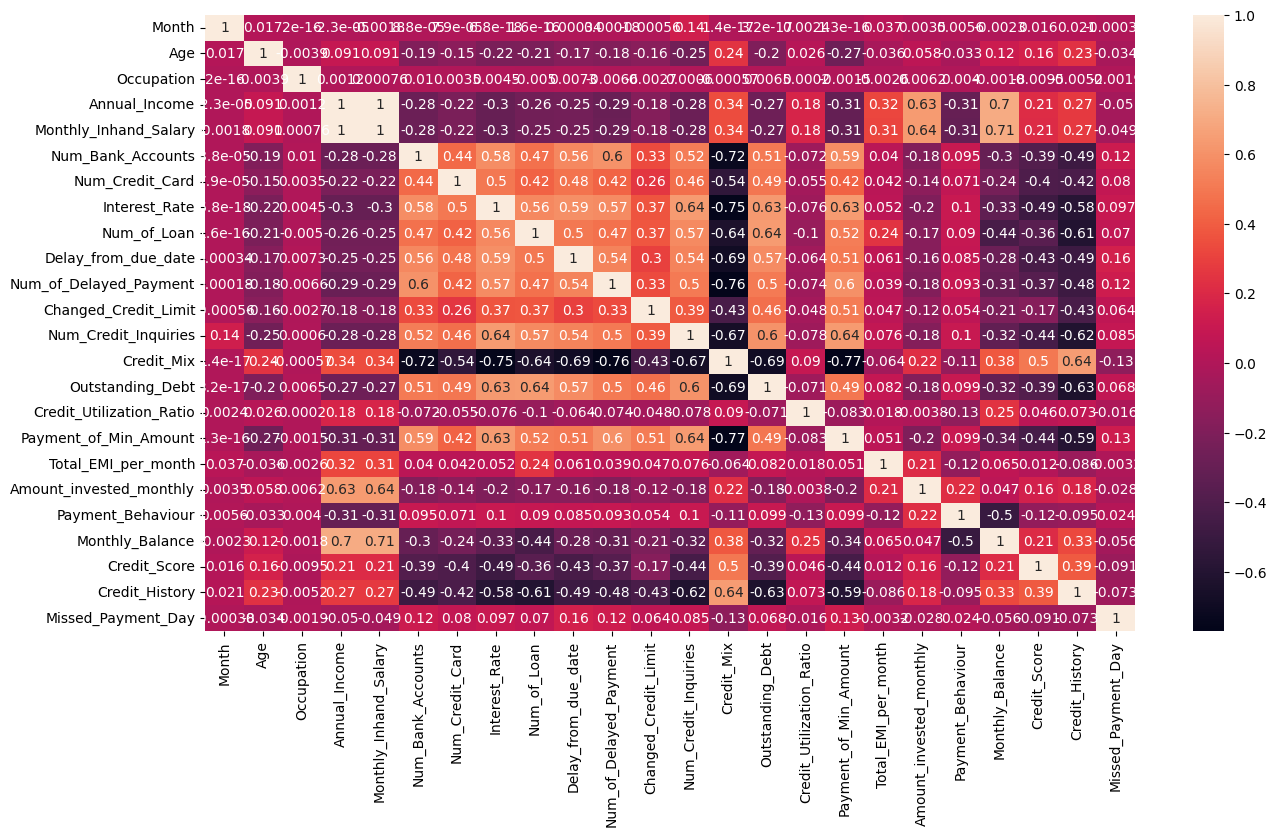

In [ ]:
plt.figure(figsize= (15,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History,Missed_Payment_Day
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,4.500000,33.311294,6.949840,50519.155472,4198.468568,5.368828,5.533620,14.53208,3.532880,21.095040,13.318161,10.465068,5.743344,0.066160,1426.220376,32.285173,0.594320,111.963193,195.751837,2.757550,403.120320,-0.11170,221.501040,0.988050
std,2.291299,10.764679,4.309542,38335.627421,3187.369878,2.593276,2.067078,8.74133,2.446356,14.822802,6.215116,6.665930,3.778594,0.732904,1155.129026,5.116875,0.491026,179.435831,195.116198,1.847036,214.014558,0.67512,99.682343,0.108661
min,1.000000,14.000000,0.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.230000,20.000000,0.000000,0.000000,0.000000,0.000000,0.007760,-1.00000,1.000000,0.000000
25%,2.750000,24.000000,3.000000,19344.270000,1626.594167,3.000000,4.000000,7.00000,2.000000,10.000000,9.000000,5.350000,3.000000,0.000000,566.072500,28.052567,0.000000,29.337299,74.599540,1.000000,270.189030,-1.00000,145.000000,1.000000
50%,4.500000,33.000000,7.000000,37002.580000,3096.378333,5.000000,5.000000,13.00000,3.000000,18.000000,14.000000,9.400000,5.000000,0.000000,1166.155000,32.305784,1.000000,66.619336,131.209101,3.000000,337.114461,0.00000,220.000000,1.000000
75%,6.250000,42.000000,11.000000,71689.680000,5961.637500,7.000000,7.000000,20.00000,5.000000,28.000000,18.000000,14.850000,8.000000,1.000000,1945.962500,36.496663,1.000000,147.896043,239.479981,5.000000,471.570652,0.00000,302.000000,1.000000
max,8.000000,56.000000,14.000000,277803.000000,15204.633333,11.000000,11.000000,34.00000,9.000000,67.000000,25.000000,36.970000,15.000000,1.000000,4998.070000,50.000000,1.000000,4991.000000,1977.326102,5.000000,1602.040519,1.00000,404.000000,1.000000


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=762520ba-b8cf-4151-96d5-65e8763600e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>